In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp
import sklearn
from scipy import stats as st
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [8]:
#rename columns

column_names={
              'date':'dates',
              'Appliances':'energy_use_appliances',
              'lights':'energy_use_lights',
              'T1':'temperature_kitchen',
              'RH_1':'humidity_kitchen',
              'T2':'temperature_livingroom',
              'RH_2':'humidity_livingroom',
              'T3':'temperature_laundryroom',
              'RH_3':'humidity_laundryroom',
              'T4':'temperature_officeroom',
              'RH_4':'humidity_officeroom',
              'T5':'temperature_bathroom',
              'RH_5':'humidity_bathroom',
              'T6':'temperature_outsidenorth',
              'RH_6':'humidity_outsidenorth',
              'T7':'temperature_ironingroom',
              'RH_7':'humidity_ironingroom',
              'T8':'temperature_teenagerroom',
              'RH_8':'humidity_teenagerroom',
              'T9':'temperature_parentsroom',
              'RH_9':'humidity_parentsroom',
              'T-Out':'temperature_outside',
              'Press_mm_hg':'pressure',
              'RH_out':'humidity outside',
              'Windspeed':'windspeed',
              'Visibility':'visibility',
              'Tdewpoint':'tdewpoint',
              'rv1':'random_var1',
              'rv2':'random_var2'
              }

In [9]:
df=df.rename(columns=column_names)

In [10]:
df

,dates,energy_use_appliances,energy_use_lights,temperature_kitchen,humidity_kitchen,temperature_livingroom,humidity_livingroom,temperature_laundryroom,humidity_laundryroom,temperature_officeroom,...,temperature_parentsroom,humidity_parentsroom,T_out,pressure,humidity outside,windspeed,visibility,tdewpoint,random_var1,random_var2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [25]:
simple_linear_reg_df = df[['temperature_livingroom','temperature_outsidenorth']].sample(15, random_state=2)

<AxesSubplot:xlabel='temperature_livingroom', ylabel='temperature_outsidenorth'>

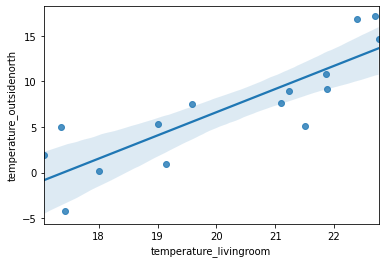

In [12]:
sns.regplot(x='temperature_livingroom',y='temperature_outsidenorth',data=simple_linear_reg_df)

In [17]:
del df['energy_use_lights']

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
features_df=normalised_df.drop(columns=['temperature_livingroom','temperature_outsidenorth'])
df_target=normalised_df['energy_use_appliances']

In [26]:
# NOW WE SPLIT THE DATASET INT0 THE TRAINING AND TESTING DATASET

# RECALL THAT WE HAD EARLIER SEGMENTED THE FEATURES AND TARGET VARIABLES

x_train, x_test, y_train, y_test = train_test_split(features_df,df_target,test_size=0.3,random_state=2)

linear_model=LinearRegression()

#fit the model to the training dataset

linear_model.fit(x_train,y_train)

#oobtain predictions

predicted_values = linear_model.predict(x_test)

#MAE

mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)

0.0

In [27]:
rmse=np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,2)

0.0

In [28]:
r2_score=r2_score(y_test,predicted_values)
round(r2_score,2)

1.0